# 2024 Project

# NSW Electricity Demand Forecast

## Methods
There are multiple methods to be used for this problem, all of which have pros and cons. We used the following ones in our modeling after reseaching the data: 


**Linear Regression**

Linear regression is a widely used statistical method for modeling relationships between variables. Compared to other models, it has following advantages: 

* Simplicity and Interpretability: Linear regression models are straightforward to understand and interpret. They provide clear insights into how each predictor variable impacts the target variable. This simplicity makes it easy to understand model outputs and decisions based on these outputs.

* Efficiency: Linear regression can be computationally less intensive compared to more complex models. This makes it suitable for situations where computational resources are limited.

* Speed: Due to its simplicity, linear regression models can be trained very quickly.

* Less Data Required: Linear regression can perform well with a relatively small amount of data and does not require as much data as more complex models to provide useful insights.

However when the relationship between variables is non-linear, Linear Regression does not work very well. In that case, we can consider an alternative to Linear Regression, such as XG-boost or others.

**ARIMA (Autoregressive Integrated Moving Average)**

ARIMA is a popular statistical method for forecasting time series data. This model incorporates both autoregressive (AR) and moving average (MA) components, along with a differencing pre-processing step to make the series stationary. Here are the advantages of using ARIMA modeling:

* Flexibility: ARIMA models can be configured in numerous ways to adapt to the specific characteristics of a time series, such as the presence of trends or seasonal patterns. By adjusting its parameters (p, d, q) and seasonal components (P, D, Q, s), ARIMA can be tailored to fit a wide range of time series.

* Predictive Power: When properly fitted, ARIMA models can provide highly accurate forecasts for time series data, assuming that future patterns and trends will follow those in the past.

* Statistical Foundation: ARIMA is based on solid statistical foundations, providing confidence intervals and significance tests for its forecasts, which are valuable for understanding the reliability of predictions.

## Tools

1. GitHub

GitHub is a platform for version control and collaboration. It allows our team to work together on projects from anywhere, managing the code in repositories.

We used it to track changes in software development projects, manage code histories, and facilitate collaboration among multiple contributors through features like issues, pull requests, and code reviews.

2. Monday.com

Monday.com is a versatile project management tool that helps teams plan, organize, and track work in a customizable workflow.

We usede it for managing projects and tasks, tracking progress, and collaboration across teams.

3. MS Office 365

Function: Office 365 is a suite of cloud-based productivity and collaboration applications that includes Microsoft Word, Excel and others.

We used the application Excel for to view datasets. 

4. Python

Python is a high-level, interpreted programming language known for its easy readability and vast ecosystem of libraries.
It is the major programing language we used in this project. 

5. Pandas

Pandas is a Python library for data manipulation and analysis.It provides data structures and functions for working with structured data primarily used for data cleaning, transformation, and analysis. 

6. Matplotlib

Matplotlib is a plotting library for the Python programming language.It is very flexible and powerful. We used it to do data visualization.

7. Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.
We used the time-series analysis model ARIMA to do the modeling.

8. Scikit-learn

Scikit-learn is a Python library for machine learning that provides simple and efficient tools for data mining and data analysis.

We used Scikit-learn to do tran-test-split, Linear Regresison modeling, Polynomial Regression modeling, and check the errors of the models. 

9. Jupyter Notebook

Jupyter Notebook is an open-source web application that allows us to create and share documents that contain live code, equations, visualizations, and narrative text.

We used it for data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. It supports interactive data science and scientific computing Python. We can also use it to export reports. 

## Data Exploration

### Read Data

We use 6 data sources: 

* temperature_nsw.csv (provided by the course)

This dataset has 3 columns: location, datetime and temperature. "location" is always Bankstown so we don't need to include it in our analysis or modeling. "datetime" has a granuality of roughly 30mins, and that is the granulity in our short-term models. "temperature" column contains the temperature column. From the dataset, it is reasonable to believe the unit is celsius degree.

* totaldemand_nsw.csv (provided by the course)

This dataset has 3 columns: datetime, totaldemand, regionid. "datetime" has a granuality of roughly 30mins, the same as temperature_nsw.csv. "totoldemand" is the Y value we want to predict. Although the unit is unclear, it does no impact us on modeling. "regeionid" is always "NSW1" and we don't need to include it into our models.

* population_nsw.csv (collected from the [website of Austraian Bureau of Statistics](https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2022))

This dataset has 2 columns: time and population. "time" has a granuality of 3 months, which is very different from the dataset of temperature_nse.csv or totaldemand_nsw.csv. Even though the time granuality of this dataset is different, we still want to include it into out modeling, because it is reasonable to believe there is a correlation between population and totaldemand. So to do the prediction correctly, we can transfer the granuality of the totaldemand to 3 months and creat new Y values. This process will be displayed in following sections.


* GDP.csv (collected from the [website of Austraian Bureau of Statistics](https://www.abs.gov.au/statistics/economy/national-accounts/australian-national-accounts-national-income-expenditure-and-product/latest-release#state-and-territory-final-demand))

This dataset has two columns: time and gdp. Same as population_nsw.csv, the granuality of time is also 3 months. We found this dataset online. We could only found GDP of the whole Australia but not NSW. Forturenatley the absolution value of GDP is not important. What matters is the change/trend. We can assume NSW consistently take a fixed portion of the whole Australian GDP and include this variable into our modeling.

* electricity_price_nsw.csv (collected from [CEIC's website](https://www.ceicdata.com/en/australia/electricity-prices/electricity-average-peak-price-new-south-wales))

This dataset has 3 columns: year, region, avgrrp. "year" has a granuality of 1 year, which is different from the above 30mins or 3 months. So to inlcude this in our long-term modeling, we can assume the change is linear within each year. In this way we can convert the yearly data to quarterly data. "region" is always "NSW". "avgrrp" is the price.

* home_solar_nsw.csv (collected from [Clean Energy Regulator, Australian Government](https://cleanenergyregulator.gov.au/markets/reports-and-data/small-scale-installation-postcode-data#installation-numbers-for-small-scale-systems-by-state/territory)). 

This dataset has 3 columns: year, nsw, solar_install. "nsw" is the yearly installation of small-scale solar panels in NSW. And "solar_install" is the accumulated solr panel installation. We can also convert this yearly data to quarterly data for modeling.

These datasets encompass crucial variables for our analysis, namely temperature, population, GDP, and energy demand. However, the GDP data reflects the national figure rather than being specific to New South Wales (NSW), as such detailed state-level data was not accessible. To adjust for this, we proceed under the assumption that GDP trends in NSW are representative of the national average, thereby applying the Australia-wide GDP statistics to our NSW-centric forecasting model.

In [143]:
# Import necessary libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

In [2]:
# Read Temperature file
df_temp = pd.read_csv('../data/NSW/temperature_nsw.csv')
df_temp.columns = df_temp.columns.str.lower()

In [3]:
# Read totaldemand file
df_demand = pd.read_csv('../data/NSW/totaldemand_nsw.csv')
df_demand.columns = df_demand.columns.str.lower()

In [4]:
# Read population file
df_population = pd.read_csv('../data/NSW/population_nsw.csv')
df_population.columns = df_population.columns.str.lower()

In [5]:
# Read GDP file
df_gdp = pd.read_csv('../data/NSW/GDP.csv')
df_gdp.columns = df_gdp.columns.str.lower()

In [74]:
# Read Eelectricity price file
df_electricity_price = pd.read_csv('../data/NSW/electricity_price_nsw.csv')
df_electricity_price.columns = df_electricity_price.columns.str.lower()

In [77]:
# Read Small Scall Solar Install file 
df_solar_install = pd.read_csv('../data/NSW/home_solar_nsw.csv')
df_solar_install.columns = df_solar_install.columns.str.lower()

### First glance at the data

In [6]:
df_temp.head()

,location,datetime,temperature
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6


In [7]:
df_temp['location'].nunique()

1

In [8]:
df_demand.head()

,datetime,totaldemand,regionid
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1


In [9]:
df_demand['regionid'].nunique()

1

In [10]:
df_population.head()

,time,population
0,Dec-2009,7101504
1,Mar-2010,7128356
2,Jun-2010,7144292
3,Sep-2010,7162726
4,Dec-2010,7179891


In [11]:
df_gdp.head()

,time,gdp
0,Dec-2009,334934
1,Mar-2010,314838
2,Jun-2010,340575
3,Sep-2010,345512
4,Dec-2010,365403


In [75]:
df_electricity_price.head()

,year,region,avgrrp
0,2010,NSW,44.19
1,2011,NSW,36.74
2,2012,NSW,29.67
3,2013,NSW,55.10
4,2014,NSW,52.26


In [78]:
df_solar_install.head()

,year,nsw,solar_install
0,2009,"14,008","14,008"
1,2010,"69,988","83,996"
2,2011,"80,272","164,268"
3,2012,"53,961","218,229"
4,2013,"33,998","252,227"


#### Data Cleaning

When looking into the temperature data, we see that for most of the data, the granuality is 30 mins. However there are some cases that the time does not fall into that range. So we need to process the data to make it more clean.

In [193]:
df_temp.head()

,time,location,datetime,temperature
0,2010-01-01 00:00:00,Bankstown,1/1/2010 0:00,23.1
1,2010-01-01 00:01:00,Bankstown,1/1/2010 0:01,23.1
2,2010-01-01 00:30:00,Bankstown,1/1/2010 0:30,22.9
3,2010-01-01 00:50:00,Bankstown,1/1/2010 0:50,22.7
4,2010-01-01 01:00:00,Bankstown,1/1/2010 1:00,22.6


In [192]:
df_temp.describe()

,temperature
count,220326.000000
mean,17.418827
std,5.849763
min,-1.300000
25%,13.400000
50%,17.700000
75%,21.300000
max,44.700000


In [194]:
df_temp = df_temp[df_temp['time'].dt.minute.isin([0, 30])]

In [195]:
df_temp.describe()

,temperature
count,195947.000000
mean,17.530995
std,5.884212
min,-1.300000
25%,13.500000
50%,17.900000
75%,21.500000
max,44.700000


In [196]:
df_temp.head()

,time,location,datetime,temperature
0,2010-01-01 00:00:00,Bankstown,1/1/2010 0:00,23.1
2,2010-01-01 00:30:00,Bankstown,1/1/2010 0:30,22.9
4,2010-01-01 01:00:00,Bankstown,1/1/2010 1:00,22.6
5,2010-01-01 01:30:00,Bankstown,1/1/2010 1:30,22.5
6,2010-01-01 02:00:00,Bankstown,1/1/2010 2:00,22.5


In [212]:
df_temp['time_diff'] = df_temp['time'].diff()
df_temp['time_diff_minutes'] = df_temp['time_diff'].dt.total_seconds() / 60

/var/folders/qy/537649fn1j10lk5___qp8vxc0000gn/T/ipykernel_83422/3666101214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_diff'] = df_temp['time'].diff()
/var/folders/qy/537649fn1j10lk5___qp8vxc0000gn/T/ipykernel_83422/3666101214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_diff_minutes'] = df_temp['time_diff'].dt.total_seconds() / 60


In [213]:
df_temp['time_diff_minutes'].unique()

array([  nan,   30.,   60.,   90.,  300.,  150.,  600.,  810.,  120.,
        180.,  330.,  240.,  690.,    0.,  210., 1050., 5430.,  450.])

We can see after cleaning, the temperate data is still not continuous.

### Check Correlation between demand and each variables

#### Temperature and Demand

In [214]:
df_temp_demand = pd.merge(df_temp, df_demand, on='datetime')

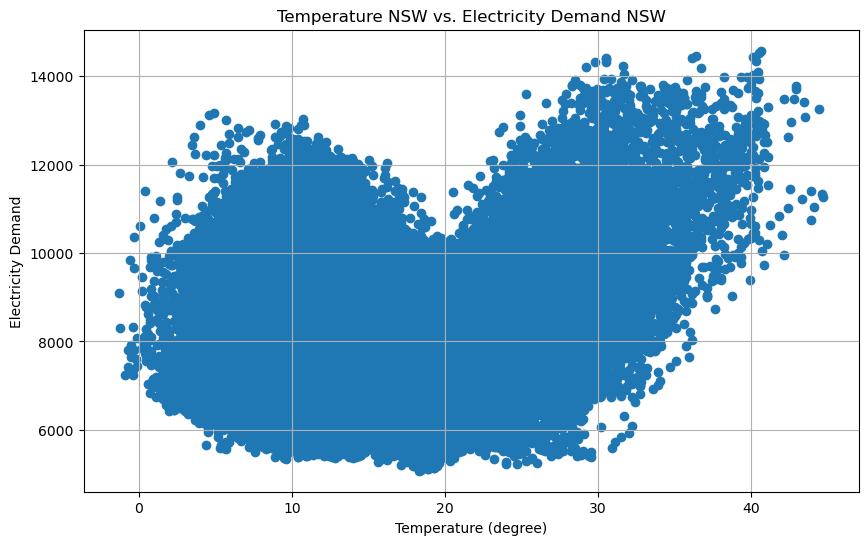

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(df_temp_demand['temperature'], df_temp_demand['totaldemand'])
plt.title('Temperature NSW vs. Electricity Demand NSW')
plt.xlabel('Temperature (degree)')
plt.ylabel('Electricity Demand')
plt.grid(True)
plt.show()

As depicted in the graph, it resembles a V shape. Below approximately 20 degrees, the demand increases as the temperature decreases; above 20 degrees, the demand rises with increasing temperature. This pattern aligns with our everyday experience. Temperature is useful in our modeling. 

#### Population and Demand

The demand is recorded every 30 mins while GDP quarterly. We shall aggregate the electricity demand to a quarterly frequency. We can calculate the average demand for each quarter. 

In [14]:
df_demand['time'] = pd.to_datetime(df_demand['datetime'], format='%d/%m/%Y %H:%M') 

In [15]:
df_demand.set_index('time', inplace=True) 
total_demand_quarterly = df_demand['totaldemand'].resample('Q').mean()
df_total_demand_quarterly = total_demand_quarterly.reset_index()

In [16]:
df_total_demand_quarterly['normalized_demand'] = (df_total_demand_quarterly['totaldemand'] - df_total_demand_quarterly['totaldemand'].mean()) / df_total_demand_quarterly['totaldemand'].std()

In [17]:
df_population['time'] = pd.to_datetime(df_population['time'], format='%b-%Y')
df_population['time'] = df_population['time'] + pd.offsets.MonthEnd(1)
df_population['normalized_population'] = (df_population['population'] - df_population['population'].mean()) / df_population['population'].std()

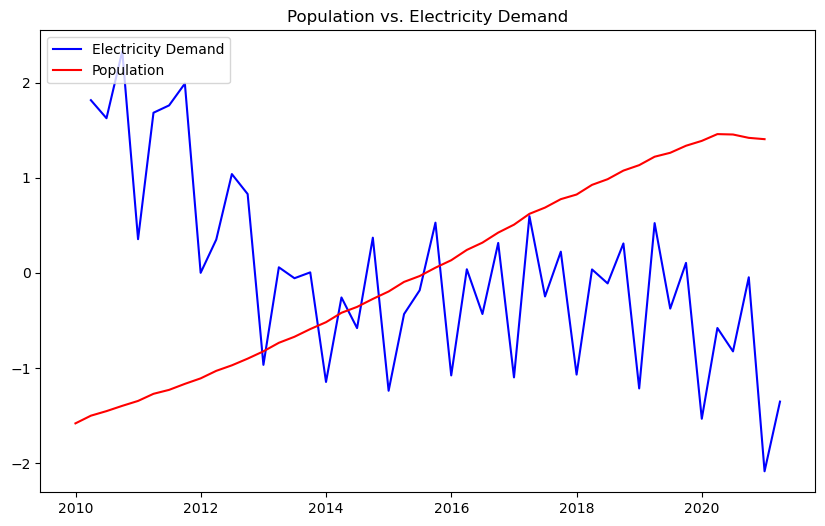

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df_total_demand_quarterly['time'], df_total_demand_quarterly['normalized_demand'], label='Electricity Demand', color='blue')
plt.plot(df_population['time'], df_population['normalized_population'], label='Population', color='red')
plt.legend(loc='upper left')
plt.title('Population vs. Electricity Demand')
plt.show()

This is very interesting. As the population grows, we would typically expect electricity demand to rise, assuming individual consumption remains steady. Contrary to this expectation, we observe a decline in electricity demand. This suggests that the per capita electricity demand is decreasing. Possible explanations for this trend might include a relative decrease in personal income against the cost of electricity, prompting individuals to limit usage, or the adoption of alternative energy sources, like residential solar panels, reducing reliance on traditional electricity supplies.

GDP can rougly (if not totally) represent the income of citizens. Let's check GDP trend first.

#### GDP and Demand

In [19]:
df_gdp['time'] = pd.to_datetime(df_gdp['time'], format='%b-%Y') + pd.offsets.MonthEnd(1)
df_gdp['normalized_gdp'] = (df_gdp['gdp'] - df_gdp['gdp'].mean()) / df_gdp['gdp'].std()

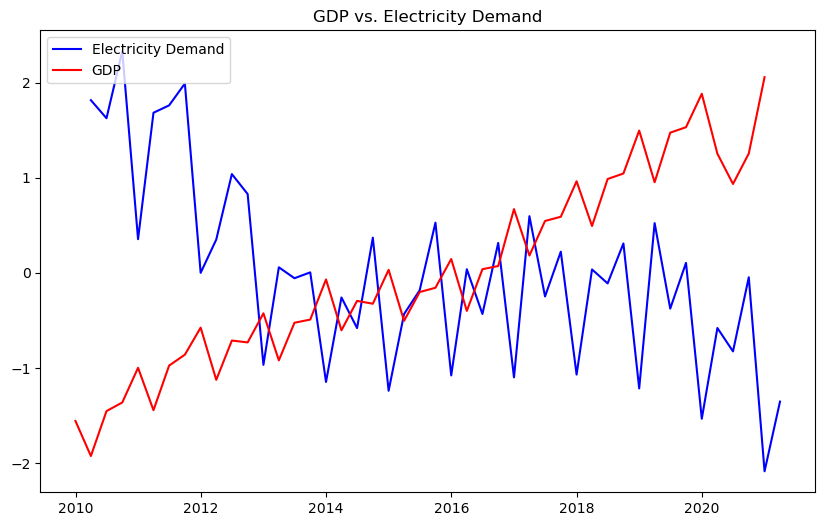

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df_total_demand_quarterly['time'], df_total_demand_quarterly['normalized_demand'], label='Electricity Demand', color='blue')
plt.plot(df_gdp['time'], df_gdp['normalized_gdp'], label='GDP', color='red')
plt.legend(loc='upper left')
plt.title('GDP vs. Electricity Demand')
plt.show()

GDP kept increasing from 2010 to 2020. So could it be that the electricity price increased a lot during that period? 

So let's check the price over the last decade. 

### Electricity Price over the last decade

In [22]:
df_electricity_price

,year,region,avgrrp
0,2010,NSW,44.19
1,2011,NSW,36.74
2,2012,NSW,29.67
3,2013,NSW,55.10
4,2014,NSW,52.26
5,2015,NSW,35.17
6,2016,NSW,51.60
7,2017,NSW,81.22
8,2018,NSW,82.27
9,2019,NSW,88.56


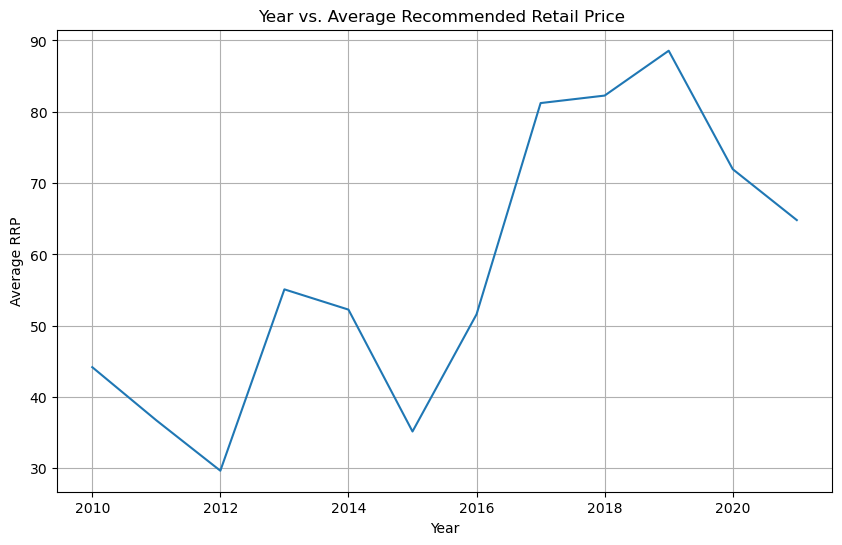

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_electricity_price['year'], df_electricity_price['avgrrp'])
plt.title('Year vs. Average Recommended Retail Price ')
plt.xlabel('Year')
plt.ylabel('Average RRP')
plt.grid(True)
plt.show()

We do see the price increased over the last decade. So in our modeling, it is better to include the factor of pricing. 

The increased adoption of residential solar panels might be another factor to consider, as this can lead to a reduction in dependency on conventional electricity grids. As more households install solar panels, the aggregate demand on traditional energy providers is likely to diminish. 

### Home Solar Installation over the last decade

Let's see how many small-scall solar installation was done in the past a decade.

In [25]:
df_solar_install

,year,nsw,solar_install
0,2009,"14,008","14,008"
1,2010,"69,988","83,996"
2,2011,"80,272","164,268"
3,2012,"53,961","218,229"
4,2013,"33,998","252,227"
5,2014,"37,210","289,437"
6,2015,"33,478","322,915"
7,2016,"29,498","352,413"
8,2017,"43,253","395,666"
9,2018,"59,329","454,995"


In [26]:
df_solar_install['solar_install'] = df_solar_install['solar_install'].str.replace(',', '')
df_solar_install['solar_install'] = df_solar_install['solar_install'].astype(int)

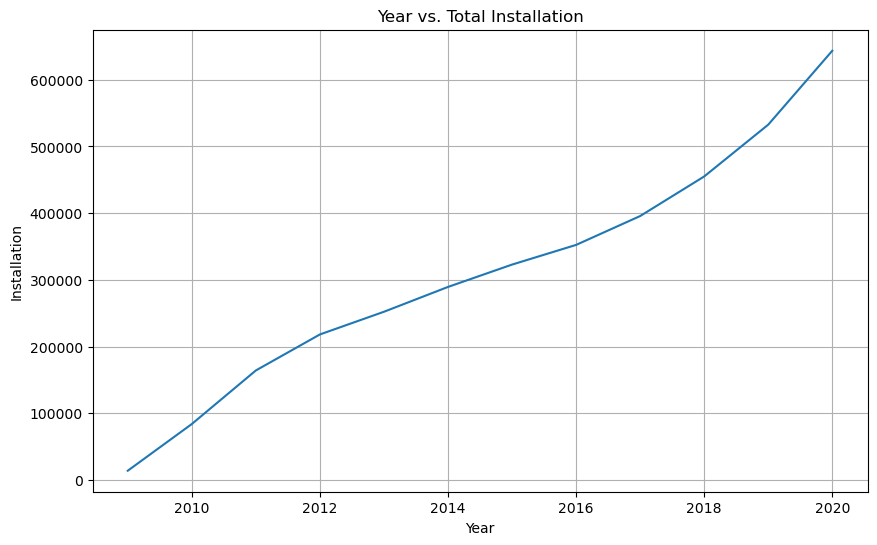

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df_solar_install['year'], df_solar_install['solar_install'])
plt.title('Year vs. Total Installation')
plt.xlabel('Year')
plt.ylabel('Installation')
plt.grid(True)
plt.show()

We can see the installation increased over the last decase. It is reasonable to include the total installation in NSW into our model too. 

## Data Preperation For Modeling

### Which kind of prediction we want to do

We can predict the average demand for a quarter. As discussed above, such a prediction should consider factors including time, quarterly average temperature, population, GDP, price, and solar installations. 

We can also predict short-term demand every 30 minutes. For such predictions, long-term factors such as population, GDP, price, or solar installations will not play a significant role. Therefore, we will exclude them from our modeling.

### Long Term Data For Modeling

When predicting quartly demand, we should use population, average temperate, and GDP. In reality we can not get the data of these features before the end of the quarter we want to predict. So to compose the data for training and testing, we need to modify our dataset a bit. 

#### Population

In [28]:
df_population.head()

,time,population,normalized_population
0,2009-12-31,7101504,-1.582523
1,2010-03-31,7128356,-1.501659
2,2010-06-30,7144292,-1.453668
3,2010-09-30,7162726,-1.398155
4,2010-12-31,7179891,-1.346464


In [29]:
df_population_quarterly = df_population.copy(deep=True)

In [30]:
# offset the time by 3 months
df_population_quarterly['time'] = df_population['time'] + pd.DateOffset(months=3)
df_population_quarterly['time'] = df_population_quarterly['time'] + pd.offsets.MonthEnd(0)

#### GDP

In [31]:
df_gdp.head()

,time,gdp,normalized_gdp
0,2009-12-31,334934,-1.557029
1,2010-03-31,314838,-1.925885
2,2010-06-30,340575,-1.453491
3,2010-09-30,345512,-1.362874
4,2010-12-31,365403,-0.997781


In [32]:
df_gdp_quarterly = df_gdp.copy(deep=True)

In [33]:
df_gdp_quarterly['time'] = df_gdp['time'] + pd.DateOffset(months=3)
df_gdp_quarterly['time'] = df_gdp_quarterly['time'] + pd.offsets.MonthEnd(0)

#### Solar Installation

In [34]:
df_solar_install.head()

,year,nsw,solar_install
0,2009,"14,008",14008
1,2010,"69,988",83996
2,2011,"80,272",164268
3,2012,"53,961",218229
4,2013,"33,998",252227


We only have annual data. We can convert yearly solar installation data to quarterly data using linear interpolation within each year.

In [35]:
quarterly_solar_install = {'year_quarter': [], 'solar_install': []}

for i in range(len(df_solar_install)):
    if i == 0:
        growth = (df_solar_install.loc[i + 1, 'solar_install'] - df_solar_install.loc[i, 'solar_install']) / 4
        for q in range(1, 5):
            quarterly_solar_install['year_quarter'].append(f"{df_solar_install.loc[i, 'year']}-Q{q}")
            quarterly_solar_install['solar_install'].append(int(df_solar_install.loc[i, 'solar_install'] + growth * (q - 1)))
    else:
        growth = (df_solar_install.loc[i, 'solar_install'] - df_solar_install.loc[i - 1, 'solar_install']) / 4
        for q in range(1, 5):
            quarterly_solar_install['year_quarter'].append(f"{df_solar_install.loc[i, 'year']}-Q{q}")
            quarterly_solar_install['solar_install'].append(int(df_solar_install.loc[i, 'solar_install'] + growth * (q - 1)))

df_quarterly_solar_install = pd.DataFrame(quarterly_solar_install)

In [36]:
df_quarterly_solar_install.head()

,year_quarter,solar_install
0,2009-Q1,14008
1,2009-Q2,31505
2,2009-Q3,49002
3,2009-Q4,66499
4,2010-Q1,83996


In [37]:
def quarter_to_date(quarter_str):
    year, q = quarter_str.split('-')
    if q == 'Q1':
        return f'{year}-03-31'
    elif q == 'Q2':
        return f'{year}-06-30'
    elif q == 'Q3':
        return f'{year}-09-30'
    elif q == 'Q4':
        return f'{year}-12-31'

In [38]:
df_quarterly_solar_install['time'] = df_quarterly_solar_install['year_quarter'].apply(quarter_to_date)

# Convert the 'end_of_quarter' column to datetime
df_quarterly_solar_install['time'] = pd.to_datetime(df_quarterly_solar_install['time'])
# Offset the time by 1 year
df_quarterly_solar_install['time'] = df_quarterly_solar_install['time'] + pd.DateOffset(months=12)

In [39]:
df_quarterly_solar_install.head()

,year_quarter,solar_install,time
0,2009-Q1,14008,2010-03-31
1,2009-Q2,31505,2010-06-30
2,2009-Q3,49002,2010-09-30
3,2009-Q4,66499,2010-12-31
4,2010-Q1,83996,2011-03-31


#### Price

In [41]:
# Same as what we did to solar install, convert price to quartely data
quarterly_price = {'year_quarter': [], 'avgrrp': []}

for i in range(len(df_electricity_price)):
    if i == 0:
        growth = (df_electricity_price.loc[i + 1, 'avgrrp'] - df_electricity_price.loc[i, 'avgrrp']) / 4
        for q in range(1, 5):
            quarterly_price['year_quarter'].append(f"{df_electricity_price.loc[i, 'year']}-Q{q}")
            quarterly_price['avgrrp'].append(df_electricity_price.loc[i, 'avgrrp'] + growth * (q - 1))
    else:
        growth = (df_electricity_price.loc[i, 'avgrrp'] - df_electricity_price.loc[i - 1, 'avgrrp']) / 4
        for q in range(1, 5):
            quarterly_price['year_quarter'].append(f"{df_electricity_price.loc[i, 'year']}-Q{q}")
            quarterly_price['avgrrp'].append(df_electricity_price.loc[i, 'avgrrp'] + growth * (q - 1))

df_quarterly_electricity_price = pd.DataFrame(quarterly_price)

In [42]:
df_quarterly_electricity_price['time'] = df_quarterly_electricity_price['year_quarter'].apply(quarter_to_date)

# Convert the 'end_of_quarter' column to datetime
df_quarterly_electricity_price['time'] = pd.to_datetime(df_quarterly_electricity_price['time'])
# Offset the time by 1 year
df_quarterly_electricity_price['time'] = df_quarterly_electricity_price['time'] + pd.DateOffset(months=12)

#### Temperature

In [43]:
df_temp['time'] = pd.to_datetime(df_temp['datetime'], format='%d/%m/%Y %H:%M') 
df_temp.set_index('time', inplace=True) 
temp_quarterly = df_temp['temperature'].resample('Q').mean()
df_temp_quarterly = temp_quarterly.reset_index()
df_temp_quarterly['time'] = df_temp_quarterly['time'] + pd.DateOffset(months=3)
df_temp_quarterly['time'] = df_temp_quarterly['time'] + pd.offsets.MonthEnd(0)

#### Create the long term quarterly dataset for training and testing

In [44]:
df_temp_install = pd.merge(df_temp_quarterly, df_quarterly_solar_install, on='time', how='inner')
df_temp_install_price = pd.merge(df_temp_install, df_quarterly_electricity_price, on='time', how='inner')
df_temp_install_price_gdp = pd.merge(df_temp_install_price, df_gdp_quarterly, on='time', how='inner')
df_temp_install_price_gdp_population = pd.merge(df_temp_install_price_gdp, df_population_quarterly, on='time', how='inner')
df_temp_install_price_gdp_population_demand = pd.merge(df_temp_install_price_gdp_population, df_total_demand_quarterly, on='time', how='inner')

**NOTE:** Depending on which model to use, 'time' may not be used in some models.

In [45]:
df_long_term = df_temp_install_price_gdp_population_demand[['temperature', 'solar_install', 'avgrrp', 'gdp', 'population', 'totaldemand']]

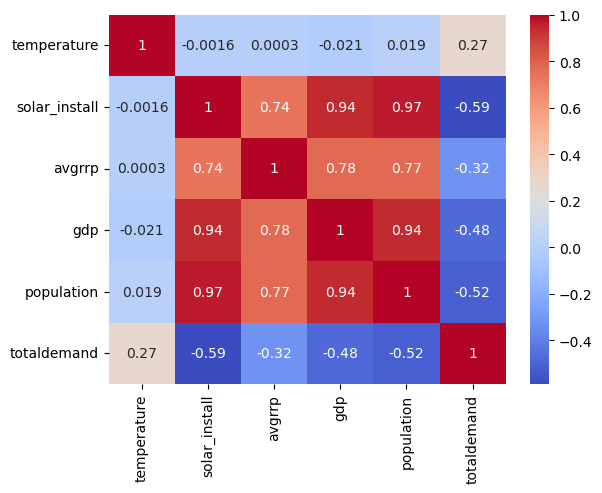

In [46]:
sns.heatmap(df_long_term.corr(), annot=True, cmap='coolwarm')
plt.show()

From the above graph, we can see the solar_instrall has the highest correlation with totaldemand. However, the other variables also have non-trivial correlations with totaldemand. So we should considder include all the variables in our modeling, inf

In [47]:
y_long_term = df_long_term['totaldemand']
X_long_term = df_long_term.drop('totaldemand', axis = 1)

In [179]:
df_long_term.describe()

,temperature,solar_install,avgrrp,gdp,population,totaldemand
count,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000
mean,17.364313,333863.731707,57.425610,428134.780488,7.675081e+06,8043.876519
std,3.728465,137842.484320,24.195789,49432.295099,3.075560e+05,403.434825
min,12.184779,83996.000000,22.352500,341094.000000,7.179891e+06,7164.215854
25%,13.931928,245209.000000,35.170000,391216.000000,7.404032e+06,7736.964693
50%,18.634972,322915.000000,52.260000,421533.000000,7.671401e+06,8086.523677
75%,20.303908,417292.000000,82.270000,471736.000000,7.954476e+06,8255.030188
max,22.943624,643413.000000,103.435000,531962.000000,8.112001e+06,9016.652115


In [170]:
X_long_term_train, X_long_term_test, y_long_term_train, y_long_term_test = train_test_split(X_long_term, y_long_term, test_size=0.2, random_state=2)

### Short Term Data For Modeling

In [49]:
df_temp = df_temp.reset_index()

In [50]:
df_demand = df_demand.reset_index()

In [51]:
df_temp_demand_short_term = pd.merge(df_temp, df_demand, on='time', how='inner')

**NOTE:** Depending on which model to use, 'time' may not be used in some models. 

In [52]:
df_short_term = df_temp_demand_short_term[['time', 'temperature', 'totaldemand']]

In [180]:
df_short_term.describe()

,temperature,totaldemand
count,195947.000000,195947.000000
mean,17.530995,8111.924589
std,5.884212,1299.171401
min,-1.300000,5074.630000
25%,13.500000,7149.430000
50%,17.900000,8052.180000
75%,21.500000,8956.985000
max,44.700000,14579.860000


In [53]:
y_short_term = df_short_term['totaldemand']
X_short_term = df_short_term.drop('totaldemand', axis = 1)

In [54]:
X_short_term_train, X_short_term_test, y_short_term_train, y_short_term_test = train_test_split(X_short_term, y_short_term, test_size=0.2, random_state=42)

## Modeling

### Modeling on the long term dataset

#### Linear Regression

For the long term data set, it is not very big. We can start from a simple Linear Regression model. It is easy to understand and interpret, works well with small datasets.

"time" is not a suitable variable in a linear regression. We can exclude it from out modeling. 

In [171]:
X_long_term_train_lr = X_long_term_train[['temperature', 'solar_install', 'avgrrp', 'gdp', 'population']]
X_long_term_test_lr = X_long_term_test[['temperature', 'solar_install', 'avgrrp', 'gdp', 'population']]
y_long_term_train_lr = y_long_term_train
y_long_term_test_lr = y_long_term_test

In [189]:
model_simple_lr = LinearRegression()

model_simple_lr.fit(X_long_term_train_lr, y_long_term_train_lr)

y_long_term_pred_simple_lr = model_simple_lr.predict(X_long_term_test_lr)

# Calculate metrics
test_mse = mean_squared_error(y_long_term_test_lr, y_long_term_pred_simple_lr)
test_r2 = r2_score(y_long_term_test_lr, y_long_term_pred_simple_lr)

print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)
print("Coefficients:", model_simple_lr.coef_)

Testing MSE: 138534.71772970693
Testing R²: 0.2887027575440213
Coefficients: [ 3.83165460e+01 -3.16708423e-03  2.51994561e-01  1.28970916e-03
  5.85898868e-04]


<Axes: >

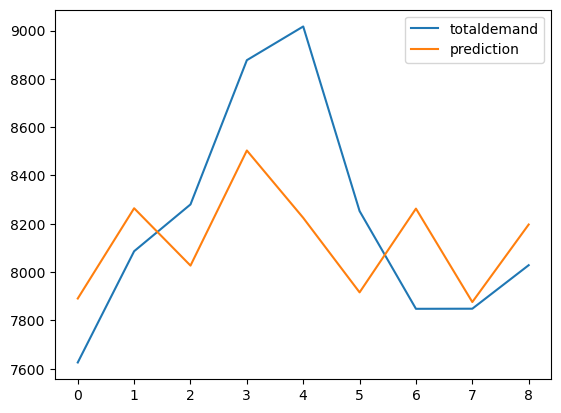

In [217]:
# Visualization 
df_simple_lr = pd.DataFrame()
df_simple_lr['totaldemand'] = list(y_long_term_test_lr)
df_simple_lr['prediction'] = list(y_long_term_pred_simple_lr)
df_simple_lr.plot()

This is a very simple model, assuming the totaldemand is proportional to the other varibles. However, from the above analysis of relationship between temperature and totaldemand (which is a V shaped correlation), it is reasonable to update the linear regression model and assume the degree is 2. 

#### Polynomial Regression

In [172]:
# Create polynomial features with degree = 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_long_term_train_lr)
X_test_poly = poly.transform(X_long_term_test_lr)

# Add a constant to the arrays for the intercept
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Fit the regression model on training data
model_lr = LinearRegression(fit_intercept=False).fit(X_train_poly, y_long_term_train_lr)
train_predictions = model_lr.predict(X_train_poly)
test_predictions = model_lr.predict(X_test_poly)

# Calculate metrics
train_mse = mean_squared_error(y_long_term_train_lr, train_predictions)
test_mse = mean_squared_error(y_long_term_test_lr, test_predictions)
train_r2 = r2_score(y_long_term_train_lr, train_predictions)
test_r2 = r2_score(y_long_term_test_lr, test_predictions)

# Compute standard errors of the parameters
mse = mean_squared_error(y_long_term_train_lr, train_predictions)
N = X_train_poly.shape[0]
P = X_train_poly.shape[1]
dof = N - P  # Degrees of freedom
XtX_inv = np.linalg.inv(X_train_poly.T.dot(X_train_poly))
variance_est = mse * np.diag(XtX_inv)
standard_errors = np.sqrt(variance_est)

# Compute t-statistics and p-values for each coefficient
t_stats = model_lr.coef_ / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) if t != 0 else 1.0 for t in t_stats]

# Display results
coefficients_df = pd.DataFrame({
    'Coefficient': model_lr.coef_,
    'Standard Error': standard_errors,
    't-Statistic': t_stats,
    'p-Value': p_values
}, index = np.concatenate((np.array(['Intercept']), poly.get_feature_names_out())))

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R²:", train_r2)
print("Testing R²:", test_r2)s
print(coefficients_df)

Training MSE: 12755.866166025673
Testing MSE: 80677.60724745081
Training R²: 0.9082678270741155
Testing R²: 0.5857662216122405
                            Coefficient  Standard Error   t-Statistic  \
Intercept                  2.043204e-01    2.732602e+05  7.477135e-07   
temperature                2.549383e+01    7.788865e+02  3.273112e-02   
solar_install             -2.135360e-01    1.672235e-01 -1.276949e+00   
avgrrp                    -3.149584e+02    2.982657e+02 -1.055966e+00   
gdp                        5.285557e-01    3.380861e-01  1.563376e+00   
population                -2.111775e-02    8.220685e-02 -2.568855e-01   
temperature^2             -4.224170e+01    5.447200e+00 -7.754755e+00   
temperature solar_install -9.142415e-04    3.496029e-04 -2.615085e+00   
temperature avgrrp        -1.820487e+00    6.242766e-01 -2.916154e+00   
temperature gdp            3.514688e-03    1.052394e-03  3.339706e+00   
temperature population     4.675365e-05    1.279655e-04  3.653615e-01 

In [173]:
# Visualization 
df_lr = pd.DataFrame()
df_lr['totaldemand'] = list(y_long_term_test_lr)
df_lr['prediction'] = list(test_predictions)

<Axes: >

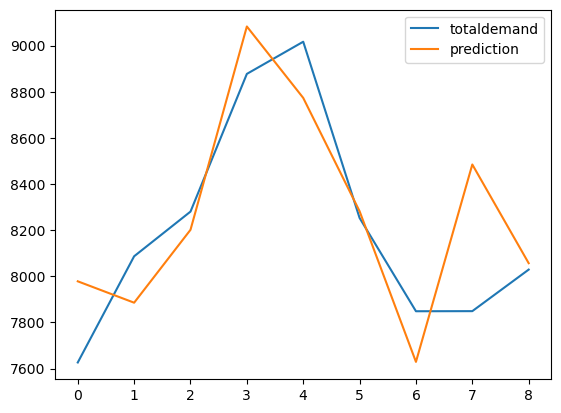

In [174]:
df_lr.plot()

We can see the Polynomial Regression prediction is better than the simple Linear Regression model.

Linear Regression is a pretty simple model but from the graph we can see the result is pretty good. We can try some other models.

### Modeling on the short term dataset

For the short term data set, it is a big one. We can start with ARIMA. 

#### ARIMA

In [106]:
df_temp_demand_short_term_arima = df_temp_demand_short_term.copy(deep=True)

In [107]:
y_arima = df_temp_demand_short_term['totaldemand']

In [108]:
msk = (y_arima.index < len(y_arima) - 336) # 48 * 7 = 336, corresponding to 7 days prediction with 30mins granuality. 
df_arima_train = y_arima[msk].copy()
df_arima_test = y_arima[~msk].copy()

ARIMA requires the time series to be stationary.

In [64]:
def check_stationarity(timeseries):
    # Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')
    df_results = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

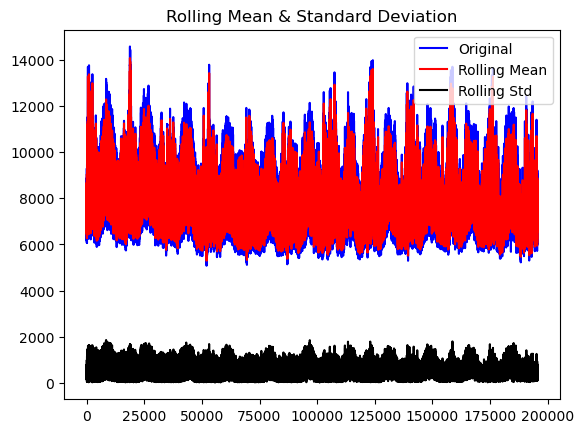

Results of Dickey-Fuller Test:
Test Statistic                    -25.483385
p-value                             0.000000
#Lags Used                         80.000000
Number of Observations Used    195530.000000
Critical Value (1%)                -3.430383
Critical Value (5%)                -2.861555
Critical Value (10%)               -2.566778
dtype: float64


In [65]:
check_stationarity(df_arima_train)

The p-value is low (<0.05) and the Test Statistic is lower than the Critical values, so this dataset has passed the stationarity check. We could apply the ARIMA model. The next step in preparing an ARIMA model is to determine the appropriate parameters: 
* p (autoregressive term), 
* d (differencing order),
* q (moving average term). 

Since it is a stationary dataset, we can easily see that d = 0. Let's try to find p and q using ACF and PACF plots.

<Figure size 1000x600 with 0 Axes>

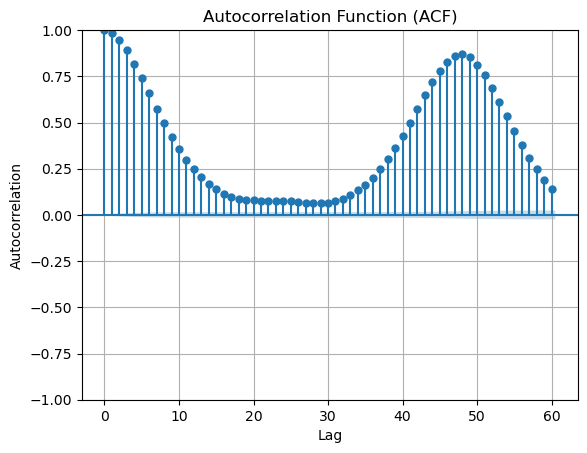

In [181]:
# ACF plot
plt.figure(figsize=(10, 6))
plot_acf(df_arima_train, lags=60)  # Change the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

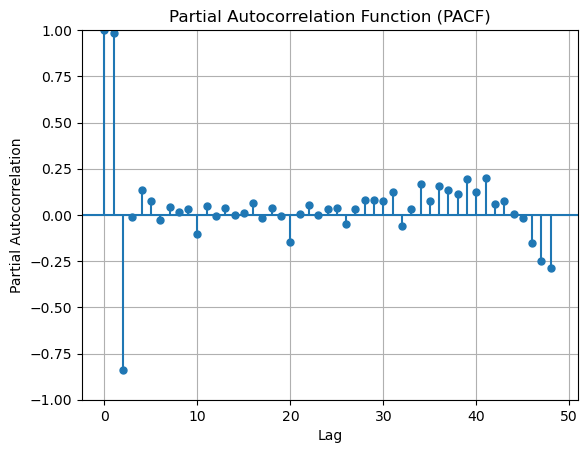

In [182]:
# PACF Plot
plt.figure(figsize=(10, 6))
plot_pacf(df_arima_train, lags=48)  #
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

We can use Grid Search to find the best values of p and q.

In [66]:
for p in (1, 2, 3, 4, 6): 
    for q in (1, 2, 4, 6, 12): 
        model = ARIMA(df_arima_train, order=(p, 0, q))
        pred = model.fit().forecast(len(df_arima_test))
        mae = mean_absolute_error(pred, df_arima_test)
        mape = mean_absolute_percentage_error(pred, df_arima_test)
        mse = mean_squared_error(pred, df_arima_test)

        print(f'p: {p}, q: {q}')
        print(f'mae: {mae}')
        print(f'mape: {mape}')
        print(f'mse: {mse}')
        print('--------------')

p: 1, q: 1
mae: 858.5320837401423
mape: 0.10727100291962295
mse: 1077240.28469661
--------------
p: 1, q: 2
mae: 858.7995151670829
mape: 0.10689342717477945
mse: 1088581.9715770255
--------------
p: 1, q: 4
mae: 853.0423050406838
mape: 0.10570724632798555
mse: 1094407.0624887603
--------------
p: 1, q: 6
mae: 848.1004664814209
mape: 0.10499590330099082
mse: 1091067.832302769
--------------
p: 1, q: 12
mae: 840.8731226435692
mape: 0.1039793002312394
mse: 1090094.9022970044
--------------
p: 2, q: 1
mae: 837.3825038985121
mape: 0.10353140133577243
mse: 1086945.7252286521
--------------
p: 2, q: 2
mae: 837.3785909602777
mape: 0.10353035363959677
mse: 1088135.188852388
--------------
p: 2, q: 4
mae: 837.7093340689217
mape: 0.10357121231749841
mse: 1088670.579056152
--------------
p: 2, q: 6
mae: 838.6219222748523
mape: 0.10369204145693195
mse: 1088853.1501495603
--------------
p: 2, q: 12
mae: 839.5334388548075
mape: 0.10380588420173636
mse: 1089558.6725872064
--------------
p: 3, q: 1
mae

/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 3, q: 4
mae: 744.8948708887336
mape: 0.09567718860816564
mse: 827112.7846404535
--------------
p: 3, q: 6
mae: 838.0468659864977
mape: 0.10361498194932234
mse: 1088968.9577091704
--------------
p: 3, q: 12
mae: 839.740240976778
mape: 0.1038316885925118
mse: 1089782.6748246253
--------------
p: 4, q: 1
mae: 840.0408300178552
mape: 0.10386850851842377
mse: 1090240.9209135498
--------------
p: 4, q: 2
mae: 839.3265449287248
mape: 0.10377848203688107
mse: 1089667.4080496803
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, q: 4
mae: 744.3533432285332
mape: 0.09561541619829106
mse: 826159.9977009211
--------------
p: 4, q: 6
mae: 840.2981915238332
mape: 0.10390177501960747
mse: 1090248.4863155002
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 4, q: 12
mae: 844.8680163968522
mape: 0.10453233984702133
mse: 1092021.2469697949
--------------
p: 6, q: 1
mae: 838.9338176008112
mape: 0.10372661740967694
mse: 1089701.1903781998
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 6, q: 2
mae: 840.6990862257919
mape: 0.10394882687594902
mse: 1091324.31030014
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 6, q: 4
mae: 835.9571489371828
mape: 0.10336446487343326
mse: 1084443.702395379
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 6, q: 6
mae: 838.014744499517
mape: 0.10362348523853526
mse: 1087519.0845989364
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 6, q: 12
mae: 845.7953653139788
mape: 0.10493554639545237
mse: 1078142.3821862245
--------------


We can see select p = 3 and q = 4. 

In [185]:
model_arima = ARIMA(df_arima_train, order=(3, 0, 4))
pred_arima = model_arima.fit().forecast(len(df_arima_test))

/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [186]:
# Check Errors
mae = mean_absolute_error(pred_arima, df_arima_test)
mape = mean_absolute_percentage_error(pred_arima, df_arima_test)
mse = mean_squared_error(pred_arima, df_arima_test)

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'mse: {mse}')

mae: 744.8948708887336
mape: 0.09567718860816564
mse: 827112.7846404535


Let's visualize the prediction and see whether it matches the test. 

In [68]:
df_temp_demand_short_term_arima['prediction'] = [None] * len(df_arima_train) + list(pred)

<Axes: >

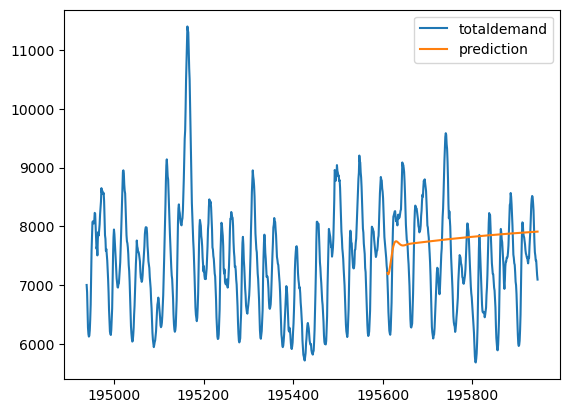

In [69]:
df_temp_demand_short_term_arima[['totaldemand', 'prediction']].tail(len(df_arima_test) * 3).plot()

We can see the prediction is almost a straight line which does not match the actual demand very well. The most possible reason is that we have not found the optimized p and q. From the ACF plot, the optimized q should be around 48, which makes sense because 48 is corresponding to 1 day recurrion. We have tried training a model with q = 48 but it just took too long and we gave up. We could try using a short period of data to see if the prediction improves.  

In [125]:
# Choose 3 months of data for training and 1 week of data for testing
msk_train_3_months = ((y_arima.index >= (len(y_arima) - (48 * 30 * 3  + 48 * 7))) & (y_arima.index < (len(y_arima) - 48 * 7))) 
df_arima_train_3_months = y_arima[msk_train_3_months].copy`()
msk_test_1_week = (y_arima.index >= len(y_arima) - 48 * 7)
df_arima_test_1_week = y_arima[msk_test_1_week].copy()

In [127]:
# Grid search to find the best p and q
for p in (1, 2, 3, 4, 6): 
    for q in (1, 2, 4, 6, 12, 24, 48): 
        model = ARIMA(df_arima_train_3_months, order=(p, 0, q))
        pred = model.fit().forecast(len(df_arima_test_1_week))
        mae = mean_absolute_error(pred, df_arima_test_1_week)
        mape = mean_absolute_percentage_error(pred, df_arima_test_1_week)
        mse = mean_squared_error(pred, df_arima_test_1_week)

        print(f'p: {p}, q: {q}')
        print(f'mae: {mae}')
        print(f'mape: {mape}')
        print(f'mse: {mse}')
        print('--------------')

/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An

p: 1, q: 1
mae: 690.1143481144973
mape: 0.09351449924396599
mse: 708743.7940082331
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 1, q: 2
mae: 688.8394725346699
mape: 0.09326381510476348
mse: 705709.1576903064
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 1, q: 4
mae: 685.5212916387003
mape: 0.09268449055026536
mse: 698591.5904309219
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 1, q: 6
mae: 683.9086455247177
mape: 0.09254984778994055
mse: 696840.1658097584
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 1, q: 12
mae: 677.092454564875
mape: 0.09149979535653113
mse: 683940.4237624115
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 1, q: 24
mae: 672.420504049116
mape: 0.09049033184916593
mse: 674626.5982644415
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 1, q: 48
mae: 662.7482943397666
mape: 0.08975258599357698
mse: 674738.5777439935
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 2, q: 1
mae: 672.5652056457975
mape: 0.09083508309704574
mse: 674892.6721343884
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 2, q: 2
mae: 674.1382490083843
mape: 0.09105116504876415
mse: 678060.5652299412
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 2, q: 4
mae: 674.7268005381799
mape: 0.09114157208188058
mse: 679489.876949357
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 2, q: 6
mae: 676.5909160374463
mape: 0.09140908351618561
mse: 682712.2502562569
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 2, q: 12
mae: 676.9501789394199
mape: 0.0914814485191799
mse: 683591.4822912944
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 2, q: 24
mae: 668.7256125834061
mape: 0.09047191008677731
mse: 667938.621101437
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 2, q: 48
mae: 644.2868473067565
mape: 0.0870490892422945
mse: 623648.1993345426
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 3, q: 1
mae: 672.9478460339592
mape: 0.09088709784197349
mse: 675700.4336383506
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 3, q: 2
mae: 676.6728630329416
mape: 0.09139560599602792
mse: 682888.5605308583
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 3, q: 4
mae: 677.0780438308462
mape: 0.0914732893441587
mse: 683555.7787278013
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 3, q: 6
mae: 675.9022958593844
mape: 0.09131043365925033
mse: 681562.9043874094
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 3, q: 12
mae: 677.5201763399416
mape: 0.09156666735654011
mse: 684671.1560643397
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 3, q: 24
mae: 671.8018414654921
mape: 0.09074946685420478
mse: 681402.4034141927
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 3, q: 48
mae: 642.0508049783491
mape: 0.08658117576405155
mse: 633261.3601098548
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

p: 4, q: 1
mae: 676.2452072719221
mape: 0.0913180857370797
mse: 682303.7168552736
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 4, q: 2
mae: 673.418729869335
mape: 0.09095624437608221
mse: 676629.6374851896
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 4, q: 4
mae: 669.171128480766
mape: 0.0904577429419812
mse: 669401.6886148382
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 4, q: 6
mae: 677.1978856175765
mape: 0.09148968689287879
mse: 683653.1852813874
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 4, q: 12
mae: 681.2081077595278
mape: 0.09215722941221463
mse: 692223.7349629679
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 4, q: 24
mae: 607.585128167355
mape: 0.08036184049856107
mse: 577072.4196678264
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 4, q: 48
mae: 636.8263363728636
mape: 0.08584009809587757
mse: 627843.3410083594
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p: 6, q: 1
mae: 676.5814619168956
mape: 0.09137214389989635
mse: 682797.4325719699
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

p: 6, q: 2
mae: 676.4587306324892
mape: 0.09134714204207467
mse: 682583.047284994
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


p: 6, q: 4
mae: 673.7893441811166
mape: 0.0910067323674994
mse: 677257.1141241895
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported i

p: 6, q: 6
mae: 674.3727240063293
mape: 0.09115114165482313
mse: 678898.8185289277
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported i

p: 6, q: 12
mae: 678.9312379747188
mape: 0.09179708366867405
mse: 686834.8472855961
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:4

p: 6, q: 24
mae: 651.8487386794578
mape: 0.08709708233523503
mse: 642064.3496108626
--------------


/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


p: 6, q: 48
mae: 632.9786741540286
mape: 0.0852624097897076
mse: 623345.4955216222
--------------


We can choose p = 4 and q = 24. 

In [128]:
model_armia_v2 = ARIMA(df_arima_train_3_months, order=(4, 0, 24))
pred_v2 = model_armia_v2.fit().forecast(len(df_arima_test_1_week))

/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/aileen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum

In [183]:
# Check Errors
mae = mean_absolute_error(pred_v2, df_arima_test_1_week)
mape = mean_absolute_percentage_error(pred_v2, df_arima_test_1_week)
mse = mean_squared_error(pred_v2, df_arima_test_1_week)

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'mse: {mse}')

mae: 607.585128167355
mape: 0.08036184049856107
mse: 577072.4196678264


Compared to the model with longer training data, errors with the shorter training data is actually smaller. We can also check the visualization. 

<Axes: >

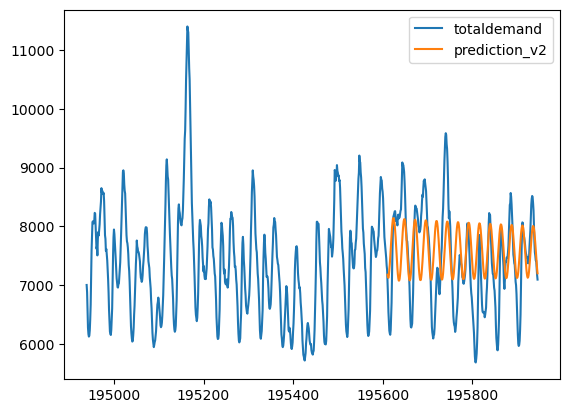

In [129]:
df_temp_demand_short_term_arima['prediction_v2'] = [None] * (len(df_temp_demand_short_term_arima) - len(pred_v2)) + list(pred_v2)
df_temp_demand_short_term_arima[['totaldemand', 'prediction_v2']].tail(len(df_arima_test_1_week) * 3).plot()

From the graph we can see the result is better than the model trained with longer data. This may be due to the fact that it is easier to find the optimized parameters for the shorter dataset.